# Preliminary layer fusion results

In [1]:
%matplotlib inline

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import AxesZero
import os
import pandas as pd
import numpy as np

matplotlib.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

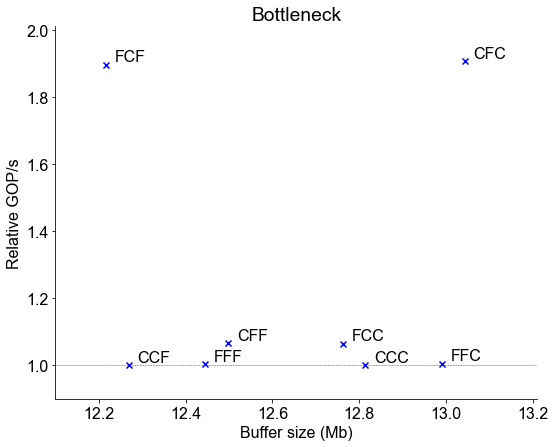

In [73]:
path = os.path.join(os.getcwd(), 'evaluation', 'build', 'bottleneck', 'results.csv')
df = pd.read_csv(path, index_col=0)
buffer_size = ((df['Block memory (BRAM18)'] * 18 +  df['Block memory (URAM)'] * 288) / 1024).values
gops = df['GOP/s'].values

# buffer_size /= np.min(buffer_size)
FC = ['F', 'C']
seqs = list(map(lambda x: (FC[x[0]], FC[x[1]], FC[x[2]]),
                zip(df['seq0'].values, df['seq1'].values, df['seq2'].values)))
gops /= np.min(gops)

fig, ax = plt.subplots(figsize=(8, 6.5))
ax.scatter(buffer_size, gops, marker='x', color='b')
ax.set_ylim(0.9, 2.01)
ax.set_xlim(12.1, 13.21)
ax.set_xlabel('Buffer size (Mb)')
ax.set_ylabel('Relative GOP/s')
ax.hlines(1.0, xmin=0, xmax=15, ls='--', lw=0.5, color='red')
ax.set_title('Bottleneck')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(len(gops)):
    ax.annotate(''.join(seqs[i]), (buffer_size[i] + 0.02, gops[i] + 0.01))

fig.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'evaluation', 'notebooks', 'outputs', 'preliminary-fusion.bottleneck.pdf'), dpi=300)

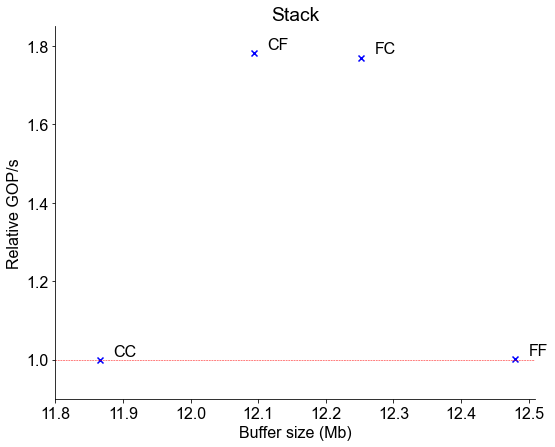

In [72]:
path = os.path.join(os.getcwd(), 'evaluation', 'build', 'conv_two_layers', 'results.csv')
df = pd.read_csv(path, index_col=0)
buffer_size = ((df['Block memory (BRAM18)'] * 18 +  df['Block memory (URAM)'] * 288) / 1024).values
gops = df['GOP/s'].values

# buffer_size /= np.min(buffer_size)
FC = ['F', 'C']
seqs = list(map(lambda x: (FC[x[0]], FC[x[1]]),
                zip(df['seq0'].values, df['seq1'].values)))
gops /= np.min(gops)

fig, ax = plt.subplots(figsize=(8, 6.5))
ax.scatter(buffer_size, gops, marker='x', color='b')
ax.set_ylim(0.9, 1.85)
ax.set_xlim(11.8, 12.51)
ax.set_xlabel('Buffer size (Mb)')
ax.set_ylabel('Relative GOP/s')
ax.hlines(1.0, xmin=0, xmax=15, ls='--', lw=0.5, color='red')
ax.set_title('Stack')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(len(gops)):
    ax.annotate(''.join(seqs[i]), (buffer_size[i] + 0.02, gops[i] + 0.01))

fig.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'evaluation', 'notebooks', 'outputs', 'preliminary-fusion.stack.pdf'), dpi=300)